In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from pprint import pprint
import sys
from colorama import Style, Fore

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("C:/Users/whileduck/Desktop/heart_2020_cleaned.csv")

feature = data.iloc[:,1:]
label = data.iloc[:,0]

In [4]:
train_x,text_x, train_y,test_y = train_test_split(feature,label)

In [5]:
df = train_x.copy()
df['target'] = train_y

# **데이터 탐색**

In [6]:
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,target
316753,31.00,No,No,No,3.0,0.0,No,Female,50-54,Hispanic,No,Yes,Good,7.0,No,No,No,No
96444,38.62,Yes,No,No,0.0,0.0,No,Female,25-29,White,No,No,Fair,8.0,Yes,No,No,No
186009,24.96,Yes,Yes,No,0.0,0.0,No,Female,35-39,White,No,No,Good,6.0,Yes,No,No,No
48551,30.43,Yes,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Good,6.0,No,No,No,No
206537,22.38,Yes,No,No,0.0,0.0,No,Male,25-29,White,No,Yes,Very good,6.0,No,No,No,No


In [7]:
def summarize(data):
    
    cols = data.columns
    
    size = round(sys.getsizeof(df) / 1024 **2,2)
    
    print(f'data size : {size}MB')
    
    result = pd.DataFrame()
    
    result['Dtype'] = data.dtypes.values
    result['Count'] = data.count().values
    result['Nunique'] = data.nunique().values
    result['Missing value'] = data.isna().sum().values
    result['Most Freq Value'] = data.mode().iloc[0].values
    
    result['Freq Value proportion'] = np.mean([
        np.array(df[col] == result['Most Freq Value'].iloc[i]) for i,col in enumerate(cols)
    ],axis = 1)
    
    
    result['Min'] = data.describe(include = 'all').T['min'].values
    result['Max'] = data.describe(include = 'all').T['max'].values
    result['Mean'] = data.describe(include = 'all').T['mean'].values
    result['Median'] = data.describe(include = 'all').T['50%'].values
    result = result.set_index(data.columns)
    
    result = result.fillna('-')
    return result


In [8]:
summarize(df)

data size : 202.09MB


,Dtype,Count,Nunique,Missing value,Most Freq Value,Freq Value proportion,Min,Max,Mean,Median
BMI,float64,239846,3395,0,26.63,0.011812,12.02,94.85,28.322721,27.32
Smoking,object,239846,2,0,No,0.587956,-,-,-,-
AlcoholDrinking,object,239846,2,0,No,0.931790,-,-,-,-
Stroke,object,239846,2,0,No,0.962292,-,-,-,-
PhysicalHealth,float64,239846,31,0,0.0,0.709772,0.0,30.0,3.368053,0.0
MentalHealth,float64,239846,31,0,0.0,0.642750,0.0,30.0,3.894286,0.0
DiffWalking,object,239846,2,0,No,0.861103,-,-,-,-
Sex,object,239846,2,0,Female,0.524862,-,-,-,-
AgeCategory,object,239846,13,0,65-69,0.106723,-,-,-,-
Race,object,239846,6,0,White,0.766746,-,-,-,-


데이터 요약본을 통해 살펴 보았을 때 일부 이진 범주형 확률 변수들의 불균형이 심한 모습을 볼 수 있다.

독립 변수의 경우에는 해당 증거가 분류하는데 있어 큰 도움을 줄 수 있지만 종속 변수의 불균형은 모델 성능의 저하를 가져 올 수 있기 때문에 resampling 을 해줘야 할 것으로 보인다.

전체적인 EDA 를 하기 전 러프하게 스케치 해보자 

RandomForest 를 활용하여 Feature importance 와 모델의 성능을 간단하게 봐보자 

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import KFold
import time 

class RoughSketch:
    
    def __init__(self,X,y):
        '''
        원 데이터를 넣으면 자동으로 label encoding 해주고 
        train_test_split 을 시행해주기
        '''
        
        self.X = X.copy()
        self.y = y.copy()
        self.probas = []
        self.predicts = []
        self.labels = []
        self.feature_importance = []
        
        enc = LabelEncoder()
        

        for col in self.X:
            
            self.X[col] = enc.fit_transform(self.X[col])
            
        self.y = self.y.map({'No': 0, 'Yes' : 1})
        
            
            
    def fit_predict(self, cv = None,random_state = None):
        '''
        랜덤 포레스트를 이용해서 roc_curve,
        '''
        
        threshold = 0.5 
        
        self.cv = cv
        
        
        if cv is None:
            cv = 3 
        if random_state is None:
            random_state = np.random.randint(0,1000, size = cv)
            
        if cv != len(random_state):
            raise ValueError('Length of Random states should match the value of cv')
            
        # 그래프 옵션 조정 
        
        self.graph_options = {}
        
        if self.cv <= 3: 
            self.graph_options['ncols'] = self.cv 
            self.graph_options['nrows'] = 1
            self.graph_options['figsize'] = (self.graph_options['ncols'] * 5, 5)
        else:
            self.graph_options['ncols'] = 3 
            self.graph_options['nrows'] = (self.cv // 3 if self.cv % 3 == 0 else self.cv // 3 + 1) 
            self.graph_options['figsize'] = (self.graph_options['ncols'] * 5 , self.graph_options['nrows'] * 5)
        
        
        total_time = 0
        
        for _ in range(cv):
            
            
            x_train,x_test,y_train,y_test = train_test_split(
                self.X,self.y, random_state = random_state[_]
            )
            
            model = RandomForestClassifier()
            
            start_time = time.time()
            
            model.fit(x_train,y_train)
            
            end_time = time.time()
            
            time_diff = end_time - start_time
            total_time += time_diff
            
            
            proba = model.predict_proba(x_test)[:,1]
                
            self.probas.append(proba)
            predict = (proba > threshold).astype(int)
            self.predicts.append(predict)
            self.labels.append(y_test)
            self.feature_importance.append(model.feature_importances_)
            
            print(f'{_ + 1} 번 째 학습 완료 , 경과 시간 : {round(time_diff,1)}초')
        
        self.feature_importance = np.mean(self.feature_importance,axis = 0) # feature importance 평균 내서 저장     
            
        print(f'전체 경과 시간 : {int(total_time // 60)}분 {int(round(total_time % 60))} 초')
            
            
    def roc_curve_graph(self):
        
        fig,ax = plt.subplots(**self.graph_options)
        
        fig.subplots_adjust(hspace = 0.5)
        ax = ax.flatten()
        
        for num in range(self.cv): # 검증 횟수 만큼
            
            fpr,tpr,_ = roc_curve(self.labels[num] , self.probas[num])
            auc = roc_auc_score(self.labels[num] , self.probas[num])
            
            ax[num].plot(fpr,tpr)
            
            if num % self.graph_options['ncols'] == 0 :
                ax[num].set_ylabel('TPR')
            else:
                ax[num].set_ylabel('')
                
            ax[num].set_xlabel('FPR')
            
            ax[num].set_title(f'{num + 1} Fold Set \n AUC : {round(auc,2)}')
            
            ax[num].plot([0,1],[0,1], ls = ':', lw = 0.5, c = 'k')
            
        fig.suptitle('Roc Curve', fontsize = 15)


    def confusion_matrix_graph(self, percent :bool = False):
        
        
        if percent:
            '''
            percentage 로 confusion matirx 를 그리기 
            '''
            cfs = [confusion_matrix(real,pred) for real,pred in zip(self.labels,self.predicts)]
            
            sums = [np.sum(cf,axis = 1) for cf in cfs]
            
            cf_matrix = []
            
            
            for cf,s in zip(cfs,sums):

                real_true = cf[0,:] / s[0]
                real_false = cf[1,:] / s[1]
                
                cf_matrix.append(np.vstack([real_true,real_false]))
                

            fmt = '.2f'
                
        else:
            cf_matrix = [confusion_matrix(real,pred) for real,pred in zip(self.labels,self.predicts)]
            fmt = 'd'
            
            
        fig,ax = plt.subplots(**self.graph_options)
        
        ax = ax.flatten()
        for _ in range(self.cv):
            
            sns.heatmap(
                cf_matrix[_],ax = ax[_],lw = 10, cbar = False, cmap = 'Blues', fmt = fmt,annot = True,
                xticklabels = ['Predicted 0', 'Predicted 1'],
                yticklabels = ['Actual 0', 'Actual 1']
            )
            
            ax[_].set_title(f'{_ + 1} Fold Confusion Matrix')
            
        fig.suptitle('Confusion Matrix')
        
        
    def feature_importance_graph(self):
        
        
        fi = pd.DataFrame(
            {'cols': self.X.columns,
            'importance': self.feature_importance}
        )
        
        fi = fi.sort_values(by = 'importance', ascending = False)
        
        fig,ax = plt.subplots(figsize = (15,10))
        
        sns.barplot(
            data = fi,
            x = 'importance',
            y = 'cols',
            ax = ax,
            palette = 'Blues_r'
        )
        
        ax.set_xlabel('Feature Importance')
        ax.set_ylabel('Cols')
        ax.set_title(f'Average Feature Importance \n Num Fold : {self.cv}')
        

In [10]:
X = df.drop('target',axis = 1)
y = df['target']
r = RoughSketch(X,y)

In [11]:
r.fit_predict(cv = 6)

1 번 째 학습 완료 , 경과 시간 : 17.1초
2 번 째 학습 완료 , 경과 시간 : 17.5초
3 번 째 학습 완료 , 경과 시간 : 17.3초
4 번 째 학습 완료 , 경과 시간 : 16.8초
5 번 째 학습 완료 , 경과 시간 : 16.8초
6 번 째 학습 완료 , 경과 시간 : 17.3초
전체 경과 시간 : 1분 43 초


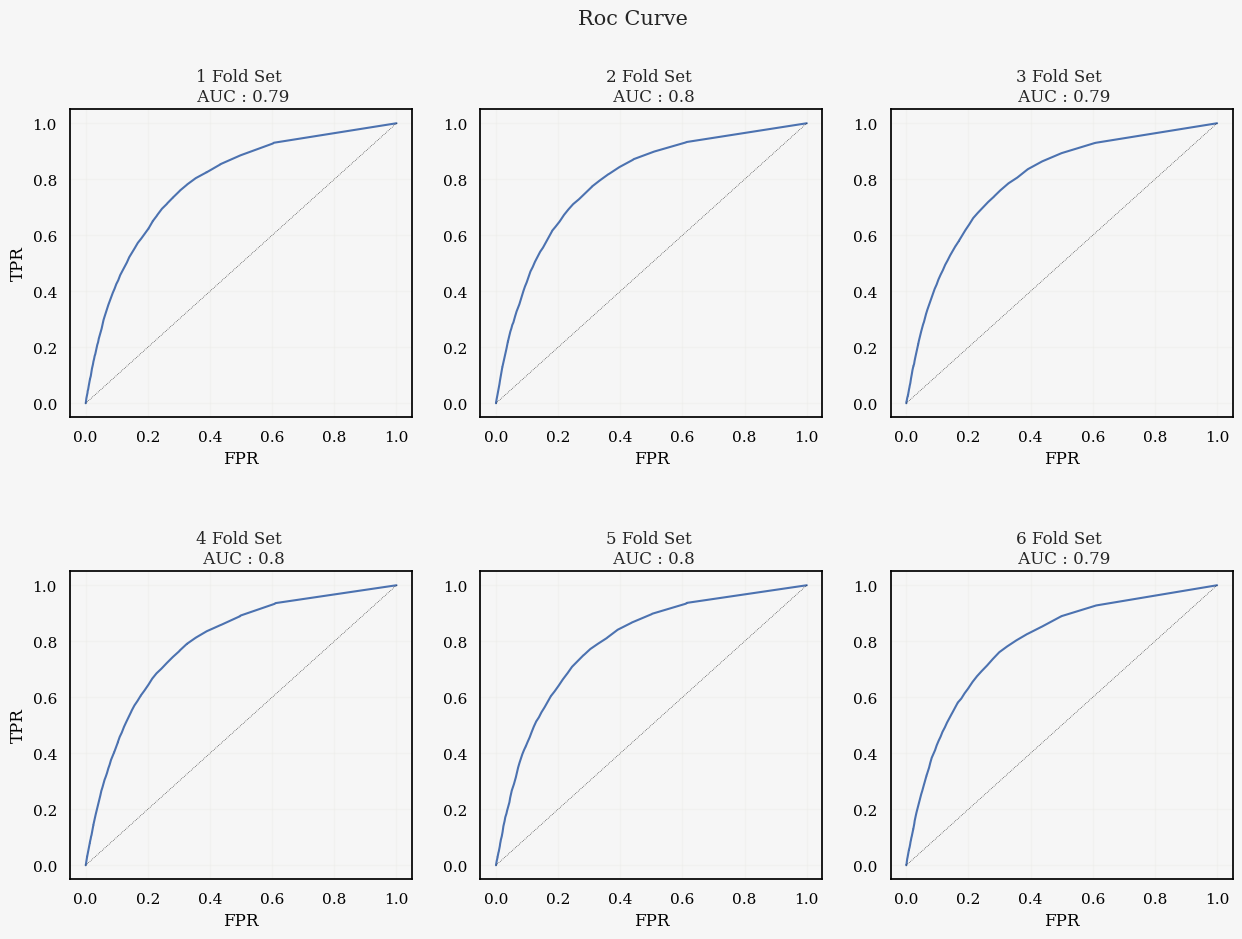

In [12]:
r.roc_curve_graph()

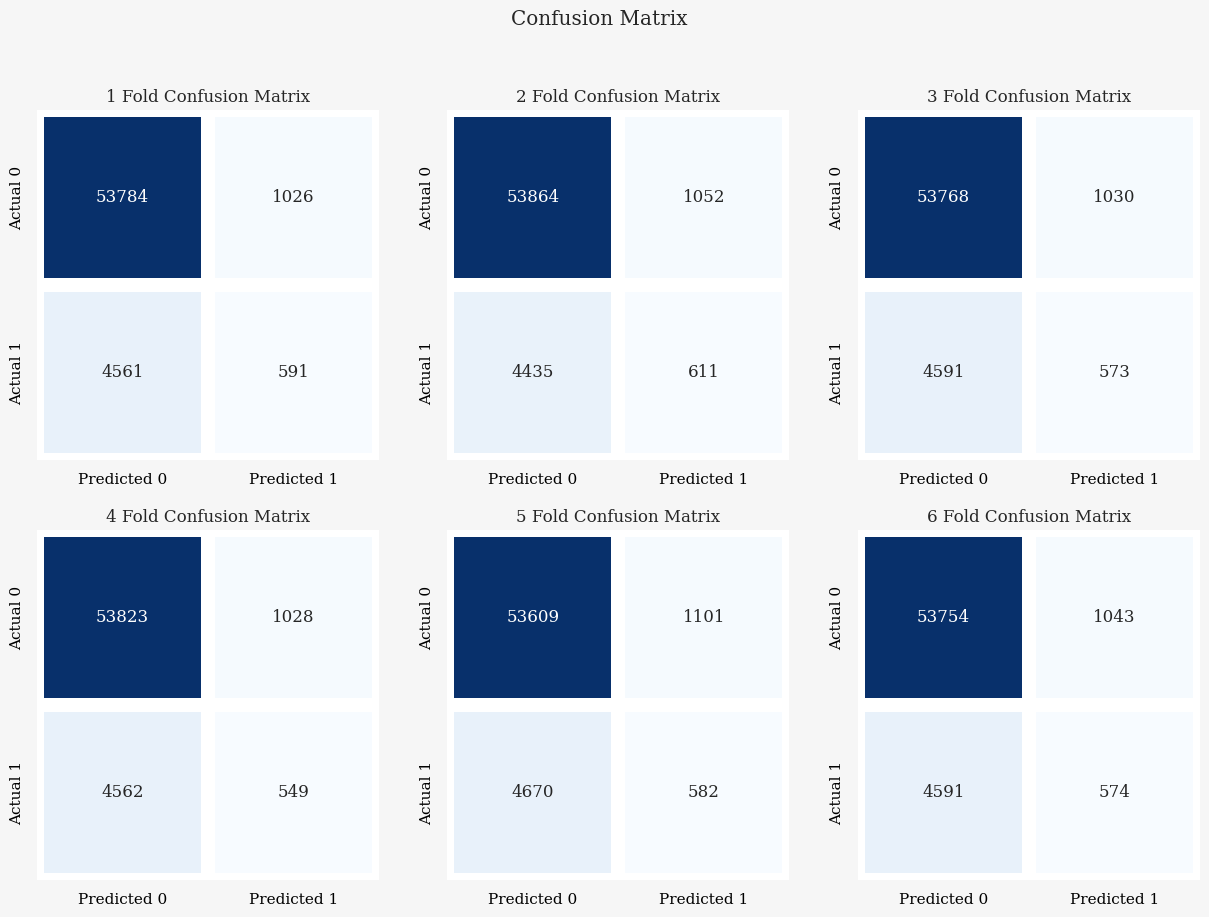

In [13]:
r.confusion_matrix_graph(percent = False)

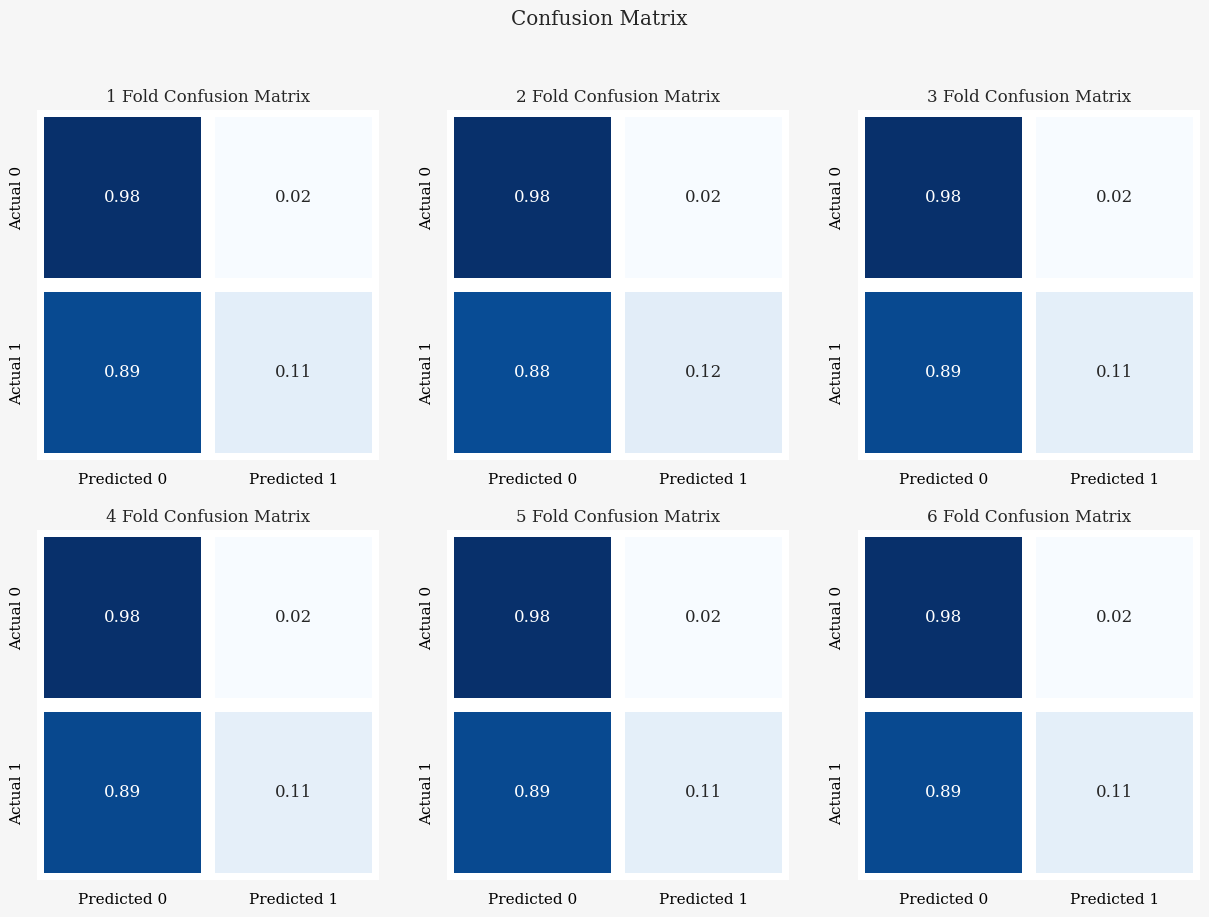

In [14]:
r.confusion_matrix_graph(percent = True)

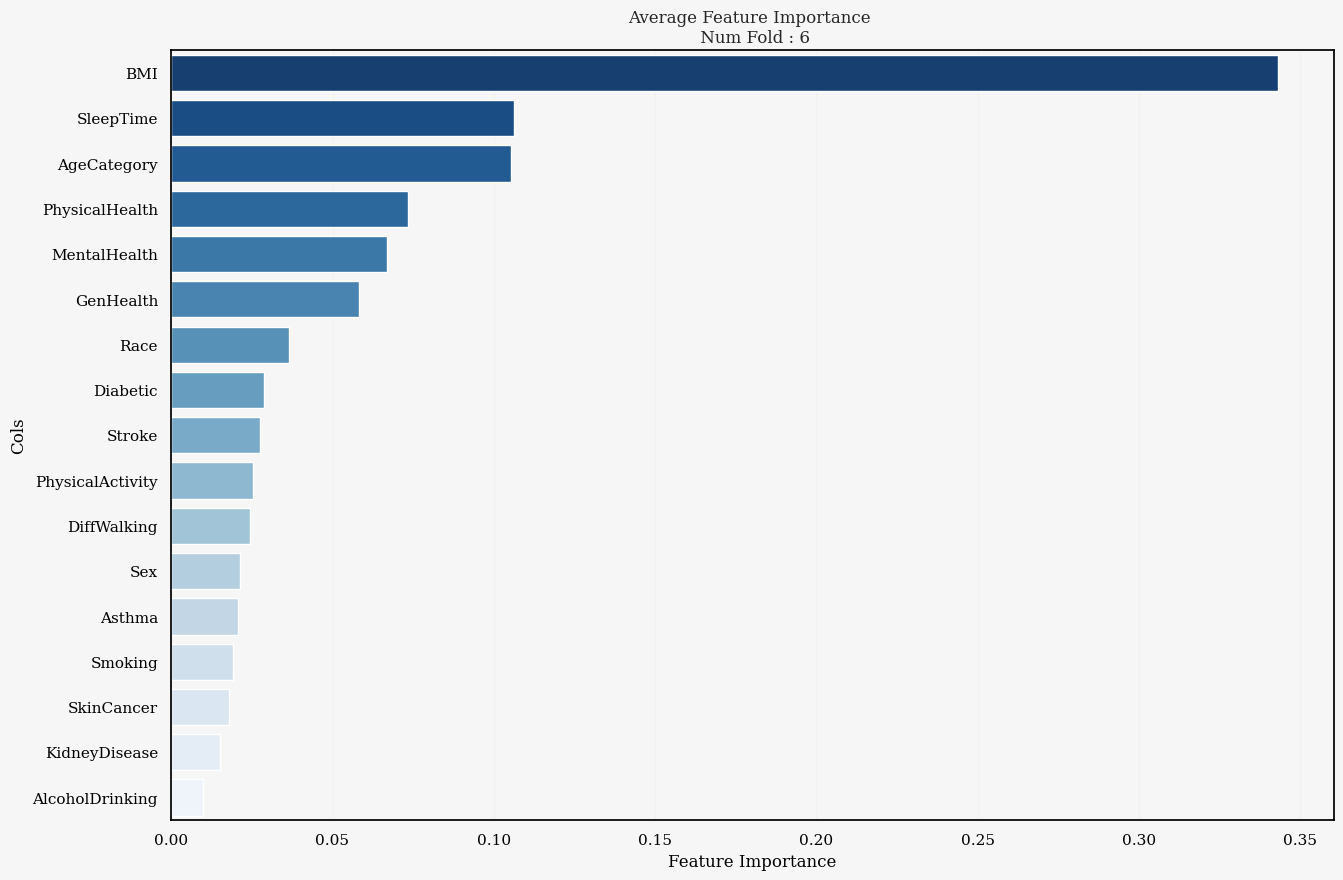

In [15]:
r.feature_importance_graph()

룰루랄라